In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import re


In [14]:
df = pd.read_csv("flight_data1.csv")

In [15]:
df.head()

,Airline,Source,Destination,Departure,Arrival,Number of Stops,Stopover Details,Price,Class
0,Air India,Toronto Pearson Intl,Bengaluru Intl,12:15,16:25+1,1 stop,", 2h 05m stopover <b>New Delhi Indira Gandhi I...","₹ 55,537",Economy
1,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,22:00,09:20+3,3 stops,", 5h 00m stopover <b>Dublin</b>, , 8h 40m stop...","₹ 54,127",Basic
2,Air India,Toronto Pearson Intl,Bengaluru Intl,12:15,18:40+1,1 stop,", 4h 20m stopover <b>New Delhi Indira Gandhi I...","₹ 55,537",Economy
3,Air India,Toronto Pearson Intl,Bengaluru Intl,12:15,20:10+1,1 stop,", 5h 55m stopover <b>New Delhi Indira Gandhi I...","₹ 56,363",Economy
4,"Air India, Vistara",Toronto Pearson Intl,Bengaluru Intl,12:15,18:45+1,1 stop,", 4h 40m stopover <b>New Delhi Indira Gandhi I...","₹ 57,928",Economy


In [6]:
df['Stopover Details']

0     , 2h 05m stopover <b>New Delhi Indira Gandhi I...
1     , 5h 00m stopover <b>Dublin</b>, , 8h 40m stop...
2     , 4h 20m stopover <b>New Delhi Indira Gandhi I...
3     , 5h 55m stopover <b>New Delhi Indira Gandhi I...
4     , 4h 40m stopover <b>New Delhi Indira Gandhi I...
5     , 6h 15m stopover <b>New Delhi Indira Gandhi I...
6     , 2h 30m stopover <b>New Delhi Indira Gandhi I...
7     , 7h 45m stopover <b>New Delhi Indira Gandhi I...
8     , 8h 25m stopover <b>New Delhi Indira Gandhi I...
9      , 2h 35m stopover <b>Paris Charles de Gaulle</b>
10     , 2h 35m stopover <b>Paris Charles de Gaulle</b>
11    , 9h 45m stopover <b>New Delhi Indira Gandhi I...
12    , 1h 40m stopover <b>New Delhi Indira Gandhi I...
13    , 9h 25m stopover <b>New Delhi Indira Gandhi I...
14              , 1h 55m stopover <b>Hong Kong Intl</b>
15    , 4h 30m stopover <b>New Delhi Indira Gandhi I...
Name: Stopover Details, dtype: object

In [16]:

data =  df['Stopover Details']

# Function to extract and convert duration to minutes
def extract_duration(duration_str):
    hours = re.search(r'(\d+)h', duration_str)
    minutes = re.search(r'(\d+)m', duration_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    return total_minutes

# Function to extract location
def extract_location(location_str):
    clean_location = re.sub(r'<.*?>', '', location_str)  # Remove HTML tags
    return clean_location.split('stopover')[-1].strip()

# Apply functions to DataFrame
df['stopover_duration'] = df['Stopover Details'].apply(lambda x: extract_duration(x))
df['stopover_location'] = df['Stopover Details'].apply(lambda x: extract_location(x))

# Drop the original column if not needed
df.drop(columns=['Stopover Details'], inplace=True)

print(df)


                 Airline                Source     Destination Departure  \
0              Air India  Toronto Pearson Intl  Bengaluru Intl     12:15   
1      Multiple Airlines  Toronto Pearson Intl  Bengaluru Intl     22:00   
2              Air India  Toronto Pearson Intl  Bengaluru Intl     12:15   
3              Air India  Toronto Pearson Intl  Bengaluru Intl     12:15   
4     Air India, Vistara  Toronto Pearson Intl  Bengaluru Intl     12:15   
5     Air India, Vistara  Toronto Pearson Intl  Bengaluru Intl     12:15   
6     Air India, Vistara  Toronto Pearson Intl  Bengaluru Intl     12:15   
7              Air India  Toronto Pearson Intl  Bengaluru Intl     12:15   
8     Air India, Vistara  Toronto Pearson Intl  Bengaluru Intl     12:15   
9             Air France  Toronto Pearson Intl  Bengaluru Intl     18:15   
10                 Delta  Toronto Pearson Intl  Bengaluru Intl     18:15   
11             Air India  Toronto Pearson Intl  Bengaluru Intl     12:15   
12  Air Indi

In [17]:
df.head()

,Airline,Source,Destination,Departure,Arrival,Number of Stops,Price,Class,stopover_duration,stopover_location
0,Air India,Toronto Pearson Intl,Bengaluru Intl,12:15,16:25+1,1 stop,"₹ 55,537",Economy,125,New Delhi Indira Gandhi Intl
1,Multiple Airlines,Toronto Pearson Intl,Bengaluru Intl,22:00,09:20+3,3 stops,"₹ 54,127",Basic,300,New Delhi Indira Gandhi Intl
2,Air India,Toronto Pearson Intl,Bengaluru Intl,12:15,18:40+1,1 stop,"₹ 55,537",Economy,260,New Delhi Indira Gandhi Intl
3,Air India,Toronto Pearson Intl,Bengaluru Intl,12:15,20:10+1,1 stop,"₹ 56,363",Economy,355,New Delhi Indira Gandhi Intl
4,"Air India, Vistara",Toronto Pearson Intl,Bengaluru Intl,12:15,18:45+1,1 stop,"₹ 57,928",Economy,280,New Delhi Indira Gandhi Intl


In [18]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Departure', 'Arrival',
       'Number of Stops', 'Price', 'Class', 'stopover_duration',
       'stopover_location'],
      dtype='object')

In [19]:
df.dtypes

Airline              object
Source               object
Destination          object
Departure            object
Arrival              object
Number of Stops      object
Price                object
Class                object
stopover_duration     int64
stopover_location    object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            16 non-null     object
 1   Source             16 non-null     object
 2   Destination        16 non-null     object
 3   Departure          16 non-null     object
 4   Arrival            16 non-null     object
 5   Number of Stops    16 non-null     object
 6   Price              16 non-null     object
 7   Class              16 non-null     object
 8   stopover_duration  16 non-null     int64 
 9   stopover_location  16 non-null     object
dtypes: int64(1), object(9)
memory usage: 1.4+ KB


C:\Users\COMFORT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


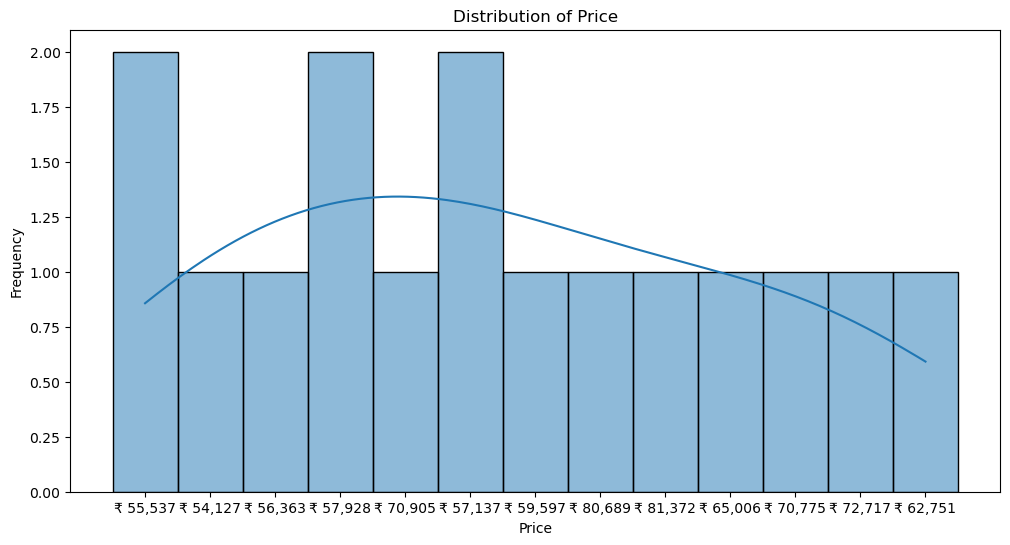

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()